In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(
    {
        "font.weight": 'bold',
        "font.size": 14,
        "mathtext.fontset":'custom',
        "mathtext.cal": 'stix:italic'
    }
)

In [ ]:
df = pd.read_pickle("save/comp_K/values_mnist_[6, 9]_gamma0.01_dim2000_lr0.005_e300_n100_MC5.pickle")
df["dis_gen"] = df["dis_risk"] - df["dis_emp"]
df["dis_gen_std"] = df["dis_risk_std"] - df["dis_emp_std"]
df["gen"] = df["risk"] - df["emp"]
df["gen_std"] = df["risk_std"] - df["emp_std"]
# df = df.iloc[:-2]
df

,dis_emp,dis_risk,emp,risk,dis_emp_std,dis_risk_std,emp_std,risk_std,bias,bias_std,dis_gen,dis_gen_std,gen,gen_std
2,0.313593,0.685743,0.000059,0.567015,0.010588,0.005386,0.000068,0.008128,0.313593,0.010588,0.372150,-0.005202,0.566956,0.008060
5,0.221044,0.507349,0.011383,0.468809,0.002973,0.009289,0.002072,0.010593,0.220450,0.003060,0.286306,0.006316,0.457426,0.008521
10,0.192139,0.415850,0.052206,0.419957,0.005814,0.004251,0.003282,0.007159,0.180506,0.006035,0.223711,-0.001564,0.367752,0.003877
25,0.191238,0.355057,0.122195,0.376037,0.002690,0.006385,0.002548,0.007506,0.128758,0.001730,0.163819,0.003695,0.253842,0.004958
50,0.203787,0.335696,0.163657,0.351588,0.000246,0.000550,0.002696,0.002328,0.099144,0.002631,0.131909,0.000304,0.187931,-0.000368


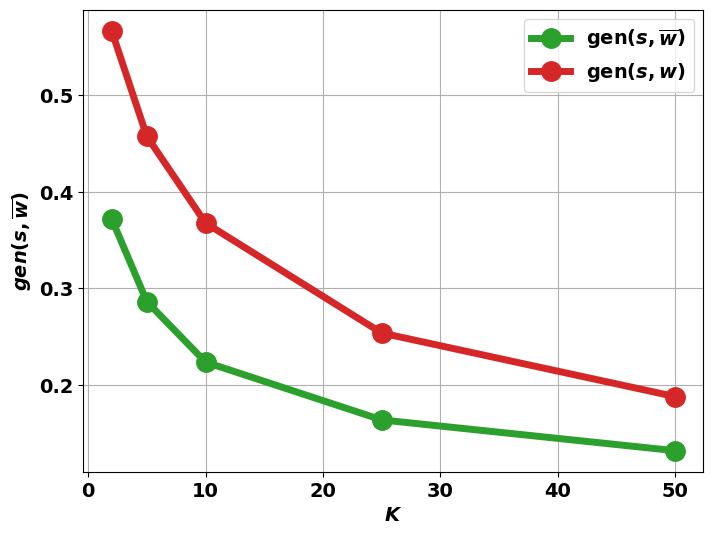

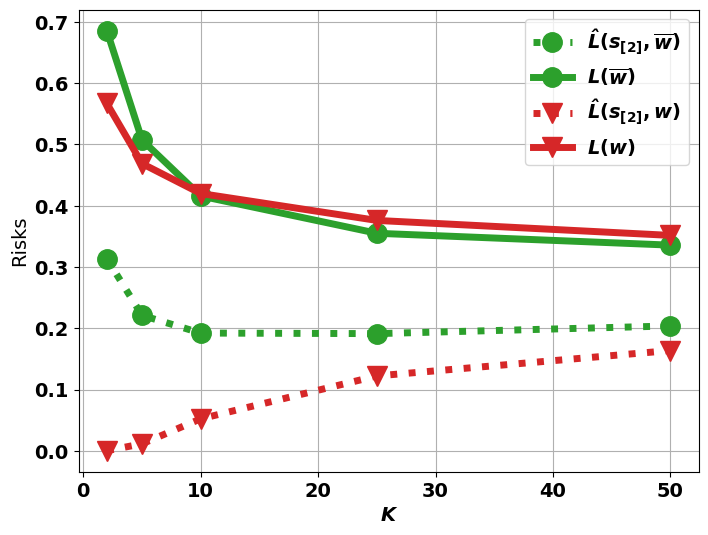

In [35]:
xrange = df.index 
palette = sns.color_palette("tab10")
plot_params = {"lw":5, "markersize":14}

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(xrange, df["dis_gen"], label=r"$\operatorname{gen}(s, \overline{w})$", marker='o', c=palette[2], **plot_params)
ax.plot(xrange, df["gen"], label=r"$\operatorname{gen}(s, w)$", marker='o', c=palette[3], **plot_params)
ax.grid(which='both')
# ax.set_yscale("log")
ax.set(xlabel=r"$K$", ylabel=r"$gen(s, \overline{w})$")
ax.legend();

fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(xrange, df1["emp_01"], marker='o', label=r"$\mathcal{\hat{L}}(s_{[2]}, \overline{w})$ (homogeneous)", ls=":", c=palette[2], **plot_params)
# ax.plot(xrange, df1["risk_01"], marker='o', label=r"$\mathcal{L}(\overline{w})$ (homogeneous)", c=palette[2], **plot_params)
# ax.plot(xrange, df2["emp_01"], marker='v', label=r"$\mathcal{\hat{L}}(s_{[2]}, \overline{w})$ (heterogeneous)", ls=":", c=palette[3], **plot_params)
# ax.plot(xrange, df2["risk_01"], marker='v', label=r"$\mathcal{L}(\overline{w})$ (heterogenous)", c=palette[3], **plot_params)

ax.plot(xrange, df["dis_emp"], marker='o', label=r"$\mathcal{\hat{L}}(s_{[2]}, \overline{w})$", ls=":", c=palette[2], **plot_params)
ax.plot(xrange, df["dis_risk"], marker='o', label=r"$\mathcal{L}(\overline{w})$", c=palette[2], **plot_params)
ax.plot(xrange, df["emp"], marker='v', label=r"$\mathcal{\hat{L}}(s_{[2]}, w)$", ls=":", c=palette[3], **plot_params)
ax.plot(xrange, df["risk"], marker='v', label=r"$\mathcal{L}(w)$", c=palette[3], **plot_params)
ax.grid(which='both')
# ax.set_yscale("log")
ax.set(xlabel=r"$K$", ylabel=r"Risks")
ax.legend();
